# Setup

In [9]:
!pip install kaggle > /dev/null

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read sample submission
pd_sample_submission = pd.read_csv("../input/sample_submission.csv")

# Voting

In [3]:
# Read modelling submission files
pd_xgboost = pd.read_csv("./submissions/2.0-modelling-xgboost.csv")
pd_fastai = pd.read_csv("./submissions/2.1-modelling-fastai.csv")
pd_tpot = pd.read_csv("./submissions/2.2-modelling-tpot.csv")
pd_xgboost.head(2)

,PassengerId,Survived
0,100000,0
1,100001,1


In [4]:
votes = (pd_xgboost.Survived + pd_fastai.Survived + pd_tpot.Survived)

# Analyze Voting

In [5]:
# Create dataset for analysis
pd_pred = (pd_xgboost.rename(columns={'Survived': 'pred_xgb'})
    .merge(pd_fastai.rename(columns={'Survived': 'pred_fastai'}), on='PassengerId')
    .merge(pd_tpot.rename(columns={'Survived': 'pred_tpot'}), on='PassengerId'))
pd_pred = (pd_pred
    .sort_values(['pred_xgb', 'pred_fastai', 'pred_tpot'], ascending=False)
    .set_index('PassengerId'))

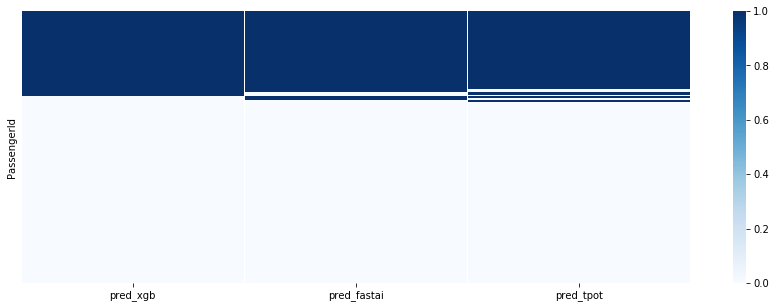

In [6]:
# Analyze predictions across modelling approaches
plt.figure(figsize=(15, 5))
sns.heatmap(pd_pred, yticklabels=False, cbar=True, cmap='Blues')
plt.show()

# Create Submission

In [7]:
# Create sumbission dataset
predictions = (votes >=2).astype(int)
pd_submission = pd_sample_submission.drop('Survived', axis=1)
pd_submission = pd_submission.assign(Survived=predictions)
pd_submission.to_csv('./submissions/3.0-prediction-voting.csv', index=False)

In [10]:
# Submit
!kaggle competitions submit -c tabular-playground-series-apr-2021 -f ./submissions/3.0-prediction-voting.csv -m "3.0-prediction-voting"

100%|█████████████████████████████████████████| 879k/879k [00:02<00:00, 411kB/s]
Successfully submitted to Tabular Playground Series - Apr 2021